### MULTIPLE LINEAR REGRESSION
###### Assignment Task:
###### Your task is to perform a multiple linear regression analysis to predict the Profit of startup company based on the given attributes.
###### Tasks:
###### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
###### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
###### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
###### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
###### NOTE:
###### Ensure to properly comment your code and provide explanations for your analysis.
###### Include any assumptions made during the analysis and discuss their implications.


## Data Exploration:

In [1]:
import pandas as pd
df = pd.read_csv("../MLR and Logistic Regression/50_Startups.csv")
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


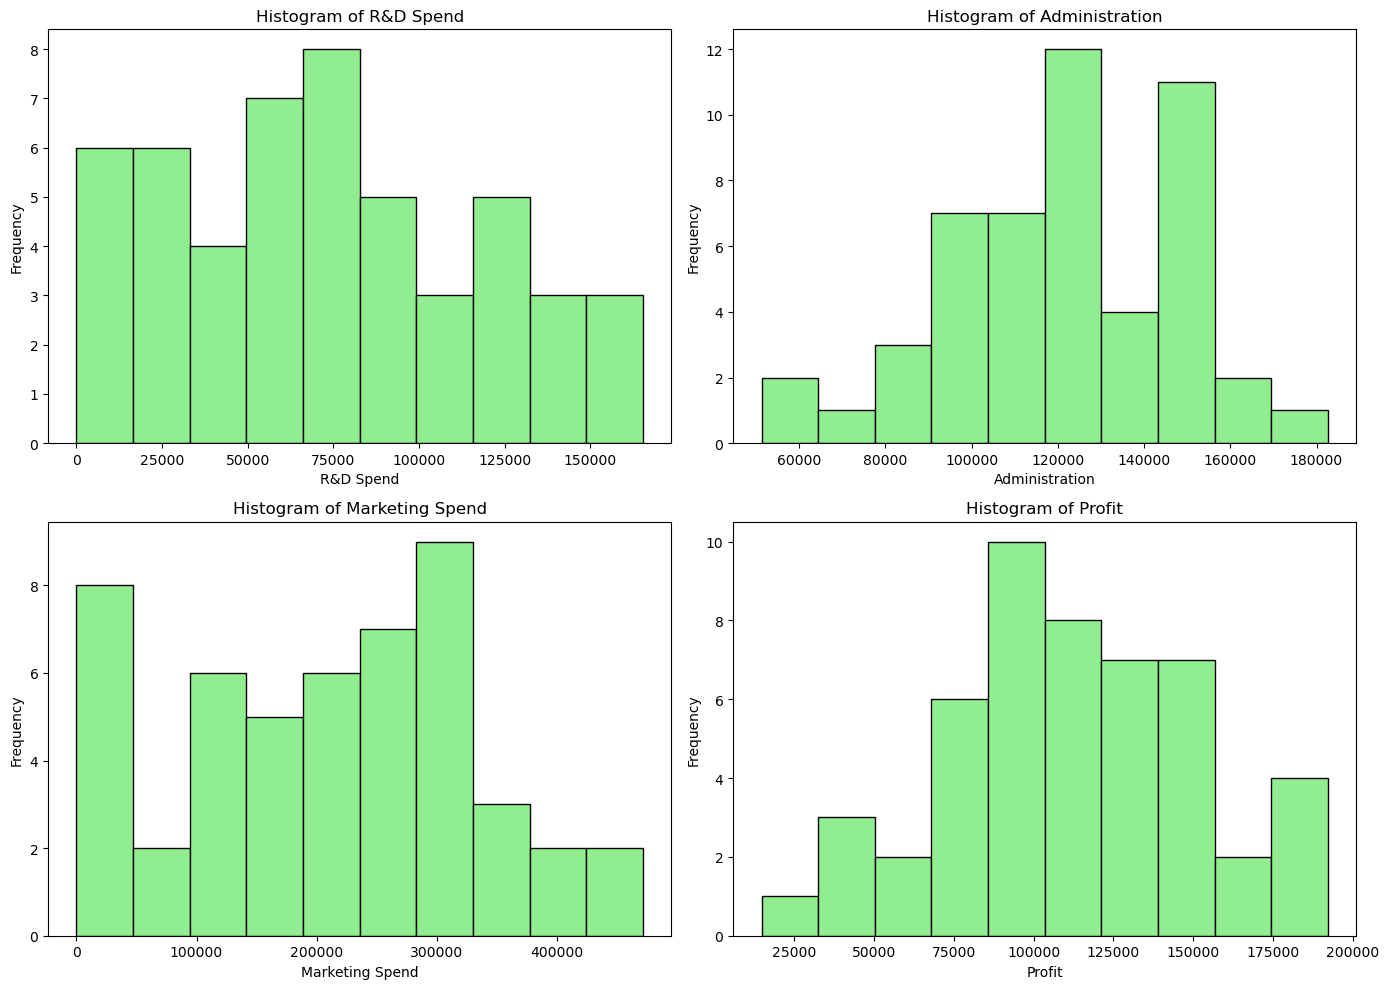

In [4]:
import matplotlib.pyplot as plt
import math
# Plot histograms for each feature
features = ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
num_features = len(features)
cols = 2  # Set number of columns (you can adjust based on your preference)
rows = math.ceil(num_features / cols)

plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[feature], bins=10, color='lightgreen', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


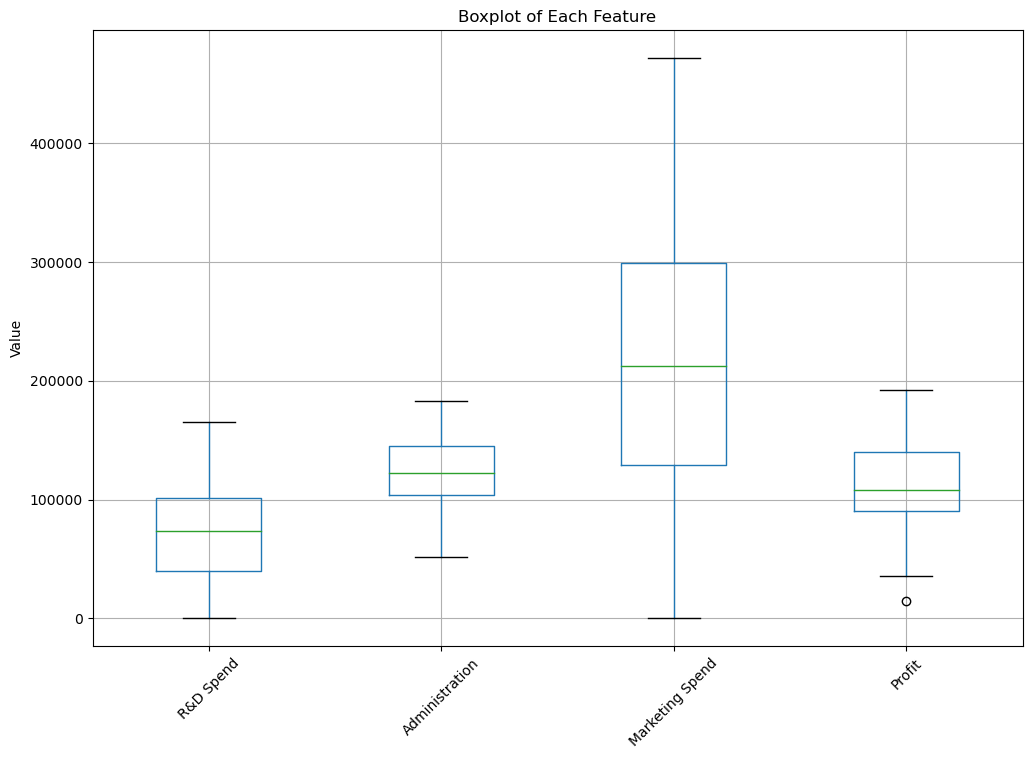

In [5]:
# Plot boxplot for each feature
features = ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
plt.figure(figsize=(12, 8))

# Using boxplot directly on the DataFrame
df[features].boxplot()

plt.title('Boxplot of Each Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

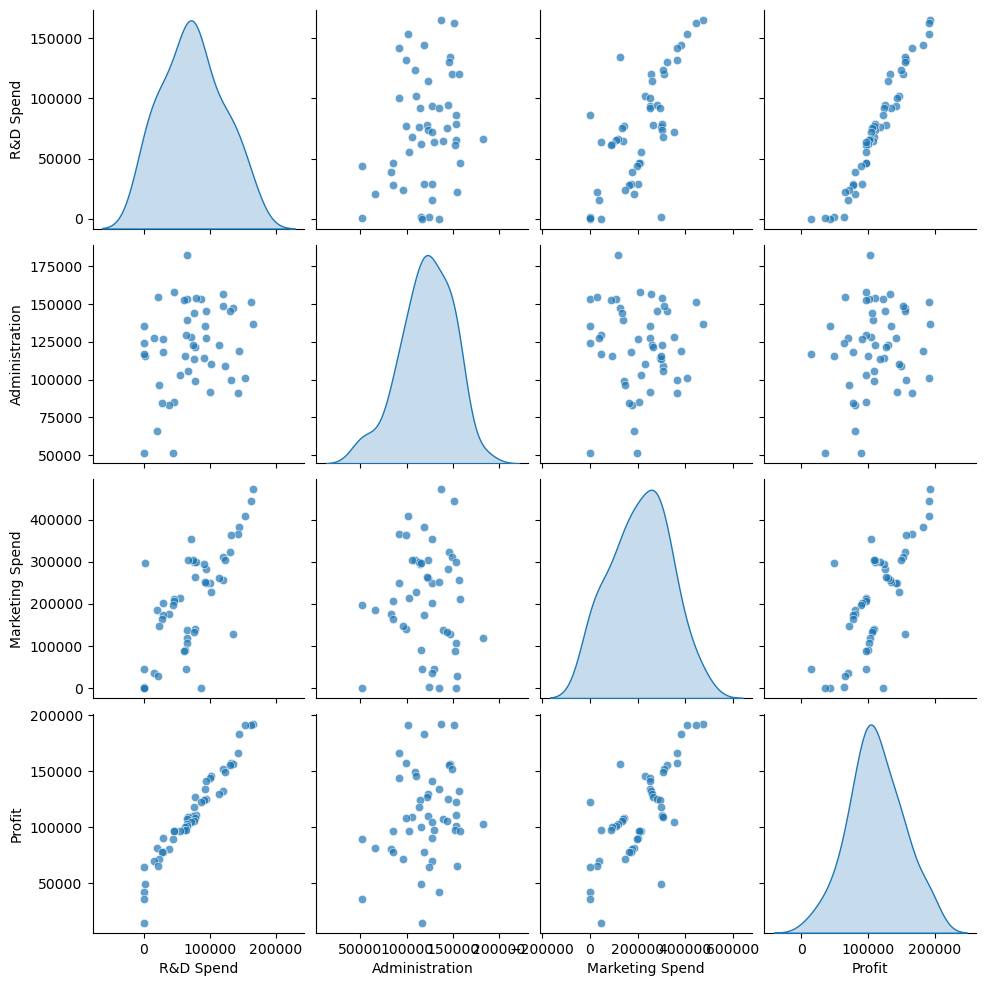

In [6]:
# # Plot Pairplot for each feature
import seaborn as sns
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.7})

## 2. Data Preprocessing:

In [7]:
# checking for missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply encoding to the 'State' column
df['State'] = label_encoder.fit_transform(df['State'])

In [9]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Define features (X) and target (y)
X = df.drop('Profit', axis=1)  # Drop the continuous 'Profit' column
y = df['Profit']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Basic Model with All Variables
# Initialize and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Display coefficients
coefficients = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                 Coefficient
R&D Spend           0.803795
Administration     -0.067910
Marketing Spend     0.031261
State             -16.820307


In [32]:
model1

LinearRegression()

In [25]:
# Predict on the test set
y_pred = model1.predict(X_test)

In [31]:
y_pred

array([126720.66150723,  84909.08961912,  98890.31854876,  46479.31240248,
       129113.18318813,  50968.88397762, 109015.01626803, 100893.57078084,
        97713.73821431, 113085.59056068])

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate MSE, RMSE, MAE, and R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [28]:
mse

80929465.49097785

In [29]:
rmse

8996.080562721627

In [13]:
# Without 'Administration' Feature
# Drop 'Administration' and build the model
X_train_m2 = X_train.drop(columns=['Administration'])
X_test_m2 = X_test.drop(columns=['Administration'])

model2 = LinearRegression()
model2.fit(X_train_m2, y_train)

# Display coefficients
coefficients_m2 = pd.DataFrame(model2.coef_, X_train_m2.columns, columns=['Coefficient'])
print(coefficients_m2)


                 Coefficient
R&D Spend           0.783493
Marketing Spend     0.039335
State             -95.065186


In [14]:
# Using Statsmodels for Detailed Summary
# Adding constant term for intercept
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

# Fit the model
model3 = sm.OLS(y_train, X_train_sm).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     179.8
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           8.18e-23
Time:                        08:50:10   Log-Likelihood:                -420.68
No. Observations:                  40   AIC:                             851.4
Df Residuals:                      35   BIC:                             859.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.408e+04   8343.396     

In [15]:
# Predict and evaluate Model 1
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1 - MSE:", mse1)
print("Model 1 - R2 Score:", r2_1)

# Predict and evaluate Model 2
y_pred2 = model2.predict(X_test_m2)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Model 2 - MSE:", mse2)
print("Model 2 - R2 Score:", r2_2)

# Predict and evaluate Model 3 (using statsmodels predictions)
X_test_sm = sm.add_constant(X_test)
y_pred3 = model3.predict(X_test_sm)
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Model 3 - MSE:", mse3)
print("Model 3 - R2 Score:", r2_3)


Model 1 - MSE: 80929465.49097785
Model 1 - R2 Score: 0.9000614254946402
Model 2 - MSE: 67474956.77158609
Model 2 - R2 Score: 0.9166761950835466
Model 3 - MSE: 80929465.48420277
Model 3 - R2 Score: 0.9000614255030066


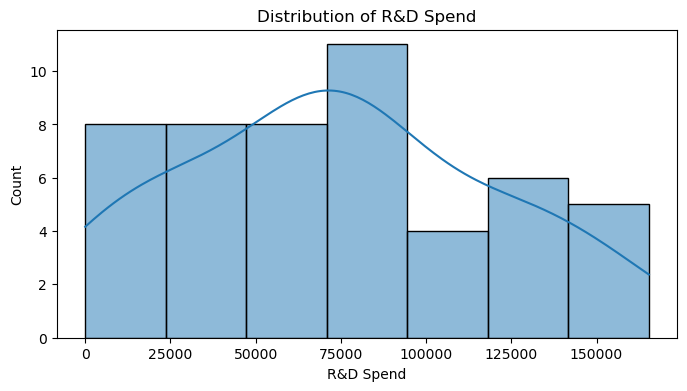

Skewness of R&D Spend: 0.164002172321177


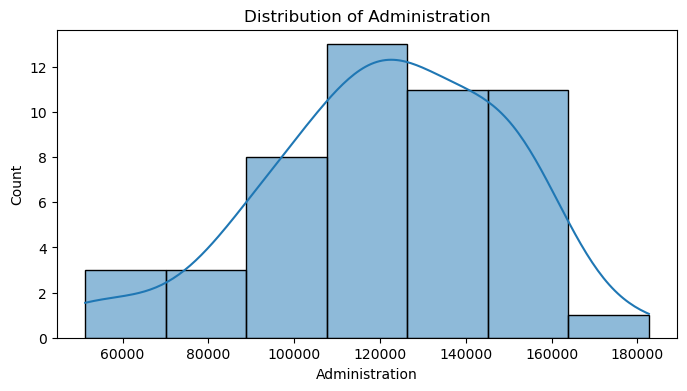

Skewness of Administration: -0.4890248099671768


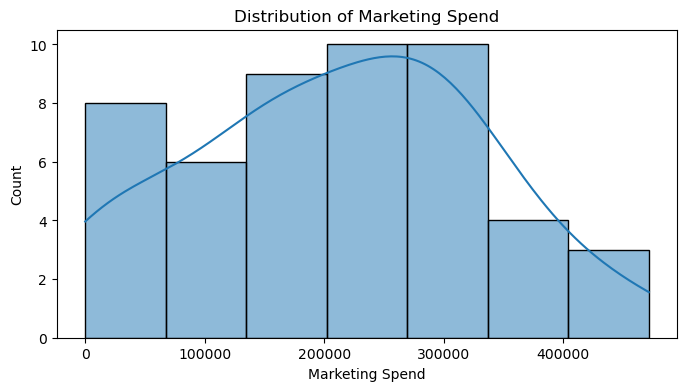

Skewness of Marketing Spend: -0.04647226758360412


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution and skewness of each variable
for column in ["R&D Spend", "Administration", "Marketing Spend"]:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()
    print(f"Skewness of {column}: {df[column].skew()}")


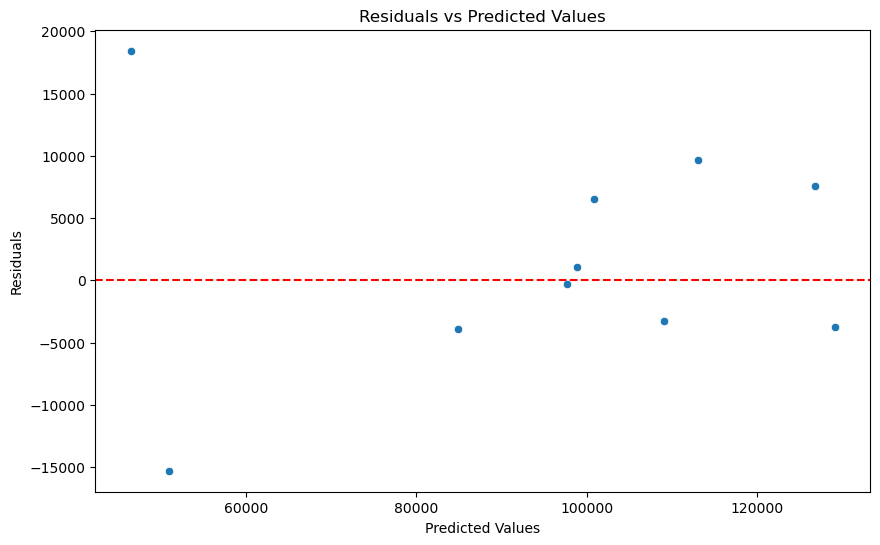

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred1

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred1, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


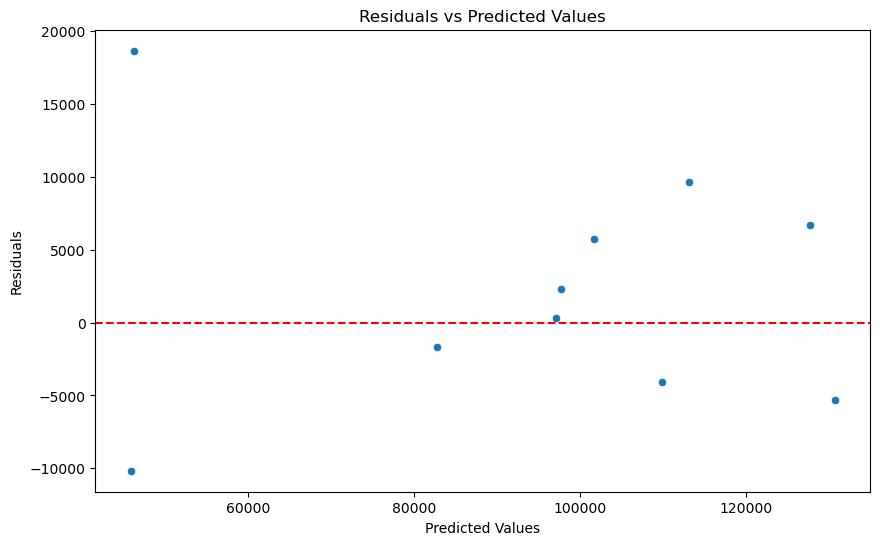

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred2

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred2, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


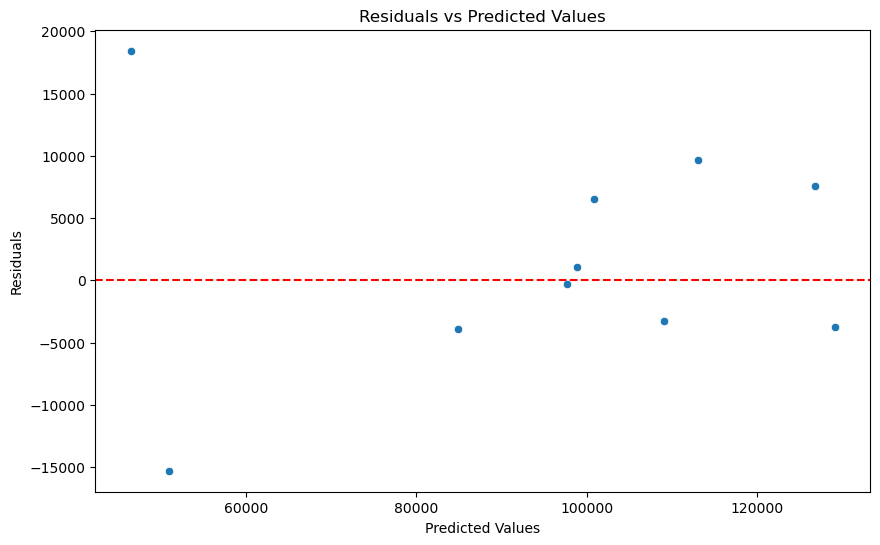

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred3

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred3, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


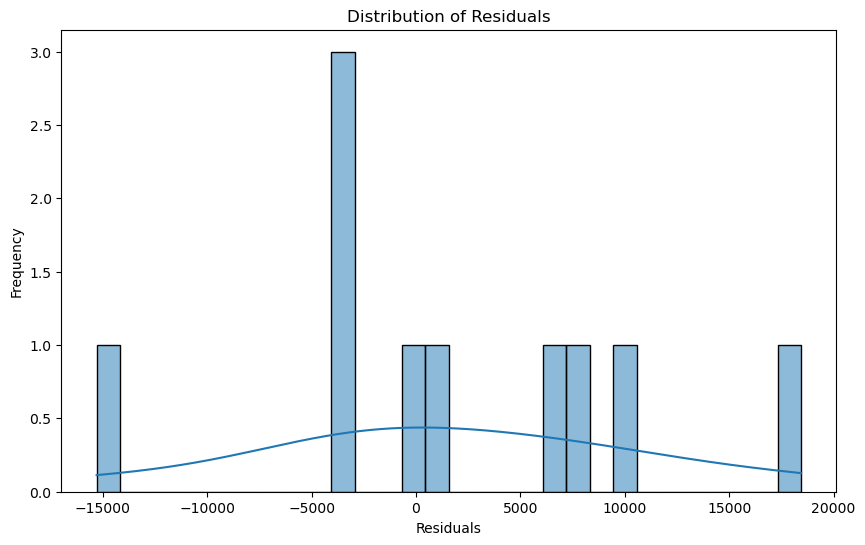

In [20]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


           Feature       VIF
0        R&D Spend  8.386322
1   Administration  4.815916
2  Marketing Spend  7.674608
3            State  2.382637


In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Using RFE to select features
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Specify the number of features to select
fit = rfe.fit(X_train, y_train)

# Summary of selected features
selected_features = pd.DataFrame({"Feature": X.columns, "Selected": fit.support_, "Rank": fit.ranking_})
print(selected_features[selected_features['Selected']])


           Feature  Selected  Rank
0        R&D Spend      True     1
1   Administration      True     1
2  Marketing Spend      True     1
3            State      True     1


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Root Mean Squared Error:", rmse_rf)
print("Random Forest R-squared:", r2_rf)


Random Forest Mean Squared Error: 62627409.56203325
Random Forest Root Mean Squared Error: 7913.748136125717
Random Forest R-squared: 0.9226623579110294


In [24]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
